In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import svm
import operator as op

# 1) Creating the Model

In [2]:
columnNames = ["DateTime",
"HipCenter X","HipCenter Y","HipCenter Z","HipCenter Depth",
"Spine X","Spine Y","Spine Z","Spine Depth",
"Head X","Head Y","Head Z","Head Depth",
"ShoulderCenter X","ShoulderCenter Y","ShoulderCenter Z","ShoulderCenter Depth",
"ShoulderLeft X","ShoulderLeft Y","ShoulderLeft Z","ShoulderLeft Depth",
"ElbowLeft X","ElbowLeft Y","ElbowLeft Z","ElbowLeft Depth",
"WristLeft X","WristLeft Y","WristLeft Z","WristLeft Depth",
"HandLeft X","HandLeft Y","HandLeft Z","HandLeft Depth",
"ShoulderRight X","ShoulderRight Y","ShoulderRight Z","ShoulderRight Depth",
"ElbowRight X","ElbowRight Y","ElbowRight Z","ElbowRight Depth",
"WristRight X","WristRight Y","WristRight Z","WristRight Depth",
"HandRight X","HandRight Y","HandRight Z","HandRight Depth",
"HipLeft X","HipLeft Y","HipLeft Z","HipLeft Depth",
"KneeLeft X","KneeLeft Y","KneeLeft Z","KneeLeft Depth",
"AnkleLeft X","AnkleLeft Y","AnkleLeft Z","AnkleLeft Depth",
"FootLeft X","FootLeft Y","FootLeft Z","FootLeft Depth",
"HipRight X","HipRight Y","HipRight Z","HipRight Depth",
"KneeRight X","KneeRight Y","KneeRight Z","KneeRight Depth",
"AnkleRight X","AnkleRight Y","AnkleRight Z","AnkleRight Depth",
"FootRight X","FootRight Y","FootRight Z","FootRight Depth"]


#Data Sets
classfication = ["moving","not moving"]

fileWalkingSet = r"C:\Users\Orozc\OneDrive\My Documents\CPP\ME 6950\Test Set\Walking"
fileNotWalking = r"C:\Users\Orozc\OneDrive\My Documents\CPP\ME 6950\Test Set\Not Walking"

#data sets
##walking
walking1 = pd.read_csv(fileWalkingSet + "\\Waling 1.txt", names = columnNames)
walking2 = pd.read_csv(fileWalkingSet + "\\Waling 2.txt", names = columnNames)
walking3 = pd.read_csv(fileWalkingSet + "\\Waling 3.txt", names = columnNames)
walking4 = pd.read_csv(fileWalkingSet + "\\Waling 4.txt", names = columnNames)
walking5 = pd.read_csv(fileWalkingSet + "\\Waling 6.txt", names = columnNames)
walking6 = pd.read_csv(fileWalkingSet + "\\Waling7.txt", names = columnNames)
walking7 = pd.read_csv(fileWalkingSet + "\\Waling8.txt", names = columnNames)
walking8 = pd.read_csv(fileWalkingSet + "\\Waling9.txt", names = columnNames)
walking9 = pd.read_csv(fileWalkingSet + "\\Waling10.txt", names = columnNames)
walking10 = pd.read_csv(fileWalkingSet + "\\Waling11.txt", names = columnNames)


##notwalking
notwalking1 = pd.read_csv(fileNotWalking + "\\Standing1.txt", names = columnNames)
notwalking2 = pd.read_csv(fileNotWalking + "\\Standing2.txt", names = columnNames)
notwalking3 = pd.read_csv(fileNotWalking + "\\Standing3.txt", names = columnNames)
notwalking4 = pd.read_csv(fileNotWalking + "\\Standing4.txt", names = columnNames)
notwalking5 = pd.read_csv(fileNotWalking + "\\Standing5.txt", names = columnNames)
notwalking6 = pd.read_csv(fileNotWalking + "\\Standing6.txt", names = columnNames)
notwalking7 = pd.read_csv(fileNotWalking + "\\Standing7.txt", names = columnNames)


#dropping depth columns
##walking
walking1 = walking1.loc[:,~walking1.columns.str.endswith('Depth')]
walking2 = walking2.loc[:,~walking2.columns.str.endswith('Depth')]
walking3 = walking3.loc[:,~walking3.columns.str.endswith('Depth')]
walking4 = walking4.loc[:,~walking4.columns.str.endswith('Depth')]
walking5 = walking5.loc[:,~walking5.columns.str.endswith('Depth')]
walking6 = walking6.loc[:,~walking6.columns.str.endswith('Depth')]
walking7 = walking7.loc[:,~walking7.columns.str.endswith('Depth')]
walking8 = walking8.loc[:,~walking8.columns.str.endswith('Depth')]
walking9 = walking9.loc[:,~walking9.columns.str.endswith('Depth')]
walking10 = walking10.loc[:,~walking10.columns.str.endswith('Depth')]


##notwalking
notwalking1 = notwalking1.loc[:,~notwalking1.columns.str.endswith('Depth')]
notwalking2 = notwalking2.loc[:,~notwalking2.columns.str.endswith('Depth')]
notwalking3 = notwalking3.loc[:,~notwalking3.columns.str.endswith('Depth')]
notwalking4 = notwalking4.loc[:,~notwalking4.columns.str.endswith('Depth')]
notwalking5 = notwalking5.loc[:,~notwalking5.columns.str.endswith('Depth')]
notwalking6 = notwalking6.loc[:,~notwalking6.columns.str.endswith('Depth')]
notwalking7 = notwalking7.loc[:,~notwalking7.columns.str.endswith('Depth')]



#fixing the columnNames
for element in columnNames:
    if "Depth" in element:
        columnNames.remove(element)

In [20]:
#Creating the model
#data /Date Time was messing with results, drop rows with na values in any columns
x = [walking1.drop(columns=["DateTime"]).dropna(),walking2.drop(columns=["DateTime"]).dropna(),
     walking3.drop(columns=["DateTime"]).dropna(),
     walking4.drop(columns=["DateTime"]).dropna(), walking5.drop(columns=["DateTime"]).dropna(),
     walking6.drop(columns=["DateTime"]).dropna(),
    walking7.drop(columns=["DateTime"]).dropna(),
     notwalking1.drop(columns=["DateTime"]).dropna(), notwalking2.drop(columns=["DateTime"]).dropna(), 
     notwalking3.drop(columns=["DateTime"]).dropna(),
     notwalking4.drop(columns=["DateTime"]).dropna(),notwalking5.drop(columns=["DateTime"]).dropna(),
     notwalking6.drop(columns=["DateTime"]).dropna(),notwalking7.drop(columns=["DateTime"]).dropna()]

X=[]
y=[]

number =[]
#break up the data and create an array of differences (get the average difference of 5 frames (5 rows))
for i in range(0,len(x)):
    a=0
    frames = 5 #getting the abs average of the frames
    #get the closest divisble number of a selected frame
    lengths = len(x[i]) - len(x[i])%frames#frames 
    for j in range(0,lengths-frames,frames): #change in pixel location
        a1 = abs(x[i].iloc[j]-x[i].iloc[j+1])
        a2 = abs(x[i].iloc[j+1]-x[i].iloc[j+2])
        a3 = abs(x[i].iloc[j+2]-x[i].iloc[j+3])
        a4 = abs(x[i].iloc[j+3]-x[i].iloc[j+4])
        a5 = abs(x[i].iloc[j+4]-x[i].iloc[j+5])
        #transpose the series, combine the series into one dataframe and grab the max values'
        a = (pd.concat([a1.to_frame().T,a2.to_frame().T,a3.to_frame().T,a4.to_frame().T,a5.to_frame().T])).max()  
        X.append(a) #max difference between five frames
        a=0
        number.append(i)
        if i<6:
            y.append(classfication[0]) #1 - walking
        else:
            y.append(classfication[1]) #2 - not walking

#splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SUPPORT VECTOR MACHINE
svm_clf = svm.SVC(kernel='rbf')  # Linear Kernel
# train the model
svm_clf.fit(X_train, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test)
# print the accuracy
print("Accuracy of Support Vector Machine: ",accuracy_score(y_test, svm_clf_pred))

Accuracy of Support Vector Machine:  0.9620253164556962


ValueError: too many values to unpack (expected 3)

<Figure size 800x600 with 0 Axes>

## Analyzing the model

In [7]:
# understand the break down of the test dataset used to create the model 

## overall coefiencts
x_axis = svm_clf.coef_[0]
print(x_axis)
y_axis = columnNames[1:]
#cursor = mplcursors.cursor(hover=True)
a = sns.barplot(x=y_axis, y=x_axis)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
a.set_title("Coefficeints of SVM Version1")
plt.show()

83


AttributeError: 'bool' object has no attribute 'all'

In [5]:
# Find out the first top 20 biggest factors
Data =[]
absData = []
factorColumns = []
counter= 0
for coef in svm_clf.coef_[0]:
    if coef == abs(coef):
        sign = 1 #opposite sign 
    else:
        sign = 2 #
    Data.append([coef,counter]) 
    absData.append([abs(coef),counter])
    #columns.append(columnNames[counter])
    counter+=1


absData.sort(reverse=True)
absData
[coef, indexes] = list(zip(*absData[:30]))
coef
sortedData = []
for index in indexes:
    sortedData.append(Data[index])
    factorColumns.append(columnNames[index+1])

[coef, indexes] = (list(zip(*sortedData)))

sns.barplot(x=list(coef), y = factorColumns).set_title("Top 30 Factors -- SVM")
plt.show()

AttributeError: coef_ is only available when using a linear kernel

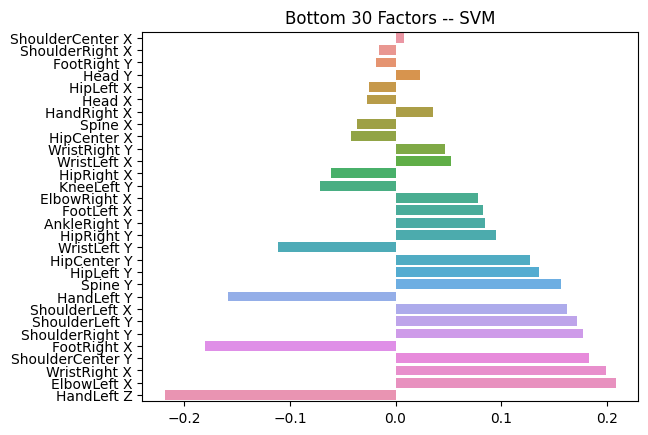

In [6]:
# Find out the first top 20 smallest factors
Data =[]
absData = []
factorColumns = []
counter= 0
for coef in svm_clf.coef_[0]:
    if coef == abs(coef):
        sign = 1 #opposite sign 
    else:
        sign = 2 #
    Data.append([coef,counter]) 
    absData.append([abs(coef),counter])
    #columns.append(columnNames[counter])
    counter+=1


absData.sort(reverse=False)
absData
[coef, indexes] = list(zip(*absData[:30]))
coef
sortedData = []
for index in indexes:
    sortedData.append(Data[index])
    factorColumns.append(columnNames[index+1])

[coef, indexes] = (list(zip(*sortedData)))

a = sns.barplot(x=list(coef), y = factorColumns).set_title("Bottom 30 Factors -- SVM")

plt.show()

# Analyze the Data

In [12]:
#how many samples surivied the pruning (no N/A) comapring Walking to not walking

#Data without dropping na

x_walking = [walking1.drop(columns=["DateTime"]),walking2.drop(columns=["DateTime"]),
     walking3.drop(columns=["DateTime"]),
     walking4.drop(columns=["DateTime"]), walking5.drop(columns=["DateTime"]),
     walking6.drop(columns=["DateTime"]).dropna(),walking7.drop(columns=["DateTime"]),
            walking8.drop(columns=["DateTime"]), walking9.drop(columns=["DateTime"]),
     walking10.drop(columns=["DateTime"]).dropna()]

x_standing=[notwalking1.drop(columns=["DateTime"]), notwalking2.drop(columns=["DateTime"]), 
     notwalking3.drop(columns=["DateTime"]),
     notwalking4.drop(columns=["DateTime"]),notwalking5.drop(columns=["DateTime"]),
     notwalking6.drop(columns=["DateTime"]),notwalking7.drop(columns=["DateTime"])]


walkingData = pd.concat(x_walking, ignore_index=True)
standingData = pd.concat(x_standing, ignore_index=True)


#Data after dropiing na
x_walking_clean = [walking1.drop(columns=["DateTime"]).dropna(),walking2.drop(columns=["DateTime"]).dropna(),
     walking3.drop(columns=["DateTime"]).dropna(),
     walking4.drop(columns=["DateTime"]).dropna(), walking5.drop(columns=["DateTime"]).dropna(),
     walking6.drop(columns=["DateTime"]).dropna(),walking7.drop(columns=["DateTime"]).dropna()]

x_standing_clean = [notwalking1.drop(columns=["DateTime"]).dropna(), notwalking2.drop(columns=["DateTime"]).dropna(), 
     notwalking3.drop(columns=["DateTime"]).dropna(),
     notwalking4.drop(columns=["DateTime"]).dropna(),notwalking5.drop(columns=["DateTime"]).dropna(),
     notwalking6.drop(columns=["DateTime"]).dropna(),notwalking7.drop(columns=["DateTime"]).dropna()]


walkingData_clean = pd.concat(x_walking_clean, ignore_index=True)
standingData_clean = pd.concat(x_standing_clean, ignore_index=True)
#Data_clean = pd.concat(x_clean)
standingData_clean_count = standingData_clean.count().to_frame(name ='values').rename_axis('joint')
walkingData_clean_count = walkingData_clean.count().to_frame(name ='values').rename_axis('joint')

#data /Date Time was messing with results, drop rows with na values in any columns

print("Walking Data Number of Values: ", len(walkingData))
print("Not Walking Data Number of Values: ", len(standingData))

print("Walking Data Number of 'NA' Values: ", len(walkingData)-len(walkingData_clean))
print("Not Walking Data Number of 'NA' Values: ", len(standingData)-len(standingData_clean))



#get the number of data points that survive the "na" value purge
diff_walking = (walkingData.count()-walkingData_clean.count()).to_frame(name ='values').rename_axis('joint')
diff_standing = (standingData.count()-standingData_clean.count()).to_frame(name ='values').rename_axis('joint')



Walking Data Number of Values:  4320
Not Walking Data Number of Values:  5835
Walking Data Number of 'NA' Values:  2901
Not Walking Data Number of 'NA' Values:  1240


## Making the Grpahs

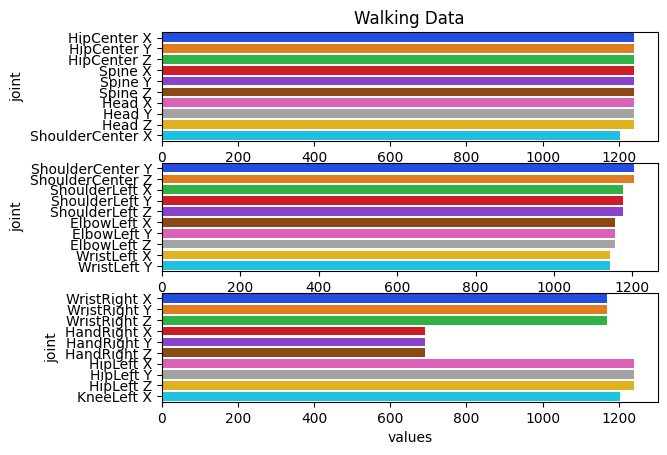

In [13]:

#create a figure
figure = plt.figure('Surviving data points')  # Figure for animation

plt.subplot(3,1,1)
a = sns.barplot(data = diff_standing.iloc[:10,], x = 'values', y=diff_standing.iloc[:10,].index,  palette='bright')  
a.set_title("Walking Data")

plt.subplot(3,1,2)
a = sns.barplot(data = diff_standing.iloc[10:20,], x = 'values', y=diff_standing.iloc[10:20,].index,  palette='bright')  
plt.subplot(3,1,3)
a = sns.barplot(data = diff_standing.iloc[30:40,], x = 'values', y=diff_standing.iloc[30:40,].index,  palette='bright') 


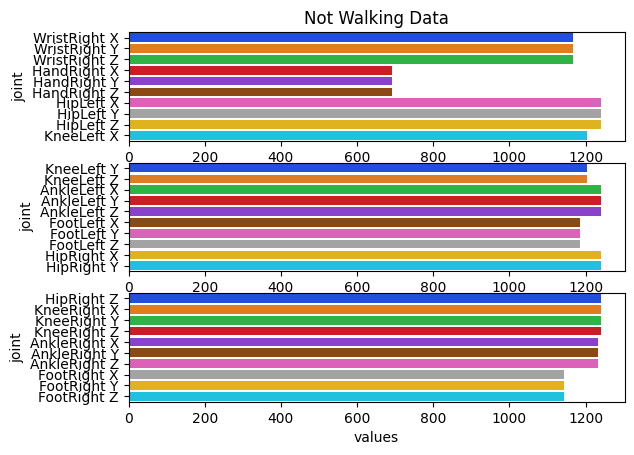

In [9]:

plt.subplot(3,1,1)
a = sns.barplot(data = diff_standing.iloc[30:40,], x = 'values', y=diff_standing.iloc[30:40,].index,  palette='bright')  
a.set_title("Not Walking Data")

plt.subplot(3,1,2)
a = sns.barplot(data = diff_standing.iloc[40:50,], x = 'values', y=diff_standing.iloc[40:50,].index,  palette='bright')  
plt.subplot(3,1,3)
a = sns.barplot(data = diff_standing.iloc[50:60,], x = 'values', y=diff_standing.iloc[50:60,].index,  palette='bright') 



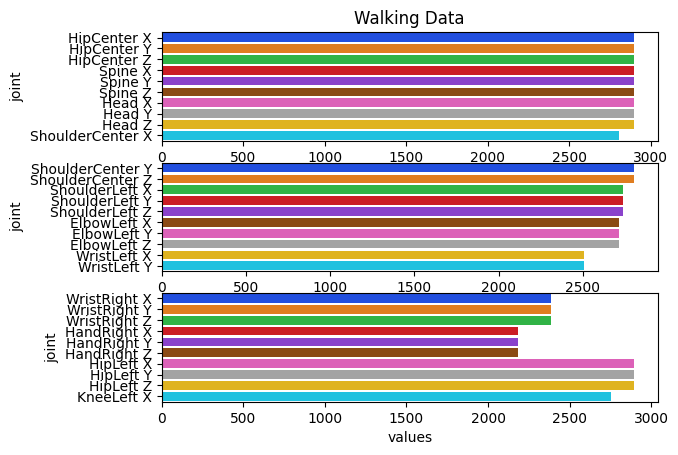

In [10]:
#create a figure
figure = plt.figure('Surviving data points')  # Figure for animation

plt.subplot(3,1,1)
a = sns.barplot(data = diff_walking.iloc[:10,], x = 'values', y=diff_walking.iloc[:10,].index,  palette='bright')  
a.set_title("Walking Data")

plt.subplot(3,1,2)
a = sns.barplot(data = diff_walking.iloc[10:20,], x = 'values', y=diff_walking.iloc[10:20,].index,  palette='bright')  
plt.subplot(3,1,3)
a = sns.barplot(data = diff_walking.iloc[30:40,], x = 'values', y=diff_walking.iloc[30:40,].index,  palette='bright') 


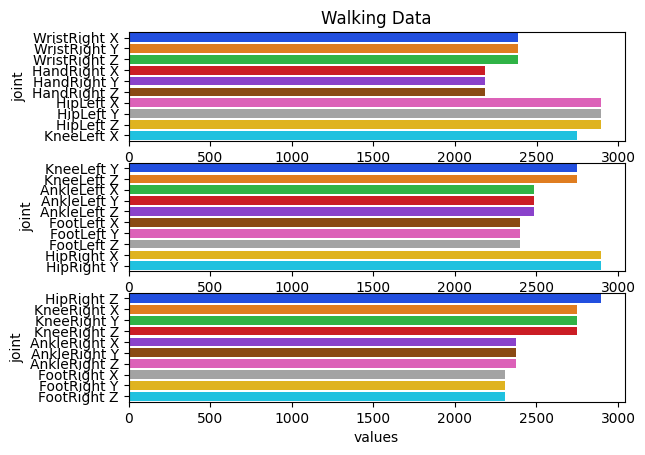

In [11]:
plt.subplot(3,1,1)
a = sns.barplot(data = diff_walking.iloc[30:40,], x = 'values', y=diff_walking.iloc[30:40,].index,  palette='bright')  
a.set_title("Walking Data")

plt.subplot(3,1,2)
a = sns.barplot(data = diff_walking.iloc[40:50,], x = 'values', y=diff_walking.iloc[40:50,].index,  palette='bright')  
plt.subplot(3,1,3)
a = sns.barplot(data = diff_walking.iloc[50:60,], x = 'values', y=diff_walking.iloc[50:60,].index,  palette='bright') 



# 2) Test the model in a not Blind Test

In [21]:
#Test with other data sets

columnNames = ["DateTime",
"HipCenter X","HipCenter Y","HipCenter Z","HipCenter Depth",
"Spine X","Spine Y","Spine Z","Spine Depth",
"Head X","Head Y","Head Z","Head Depth",
"ShoulderCenter X","ShoulderCenter Y","ShoulderCenter Z","ShoulderCenter Depth",
"ShoulderLeft X","ShoulderLeft Y","ShoulderLeft Z","ShoulderLeft Depth",
"ElbowLeft X","ElbowLeft Y","ElbowLeft Z","ElbowLeft Depth",
"WristLeft X","WristLeft Y","WristLeft Z","WristLeft Depth",
"HandLeft X","HandLeft Y","HandLeft Z","HandLeft Depth",
"ShoulderRight X","ShoulderRight Y","ShoulderRight Z","ShoulderRight Depth",
"ElbowRight X","ElbowRight Y","ElbowRight Z","ElbowRight Depth",
"WristRight X","WristRight Y","WristRight Z","WristRight Depth",
"HandRight X","HandRight Y","HandRight Z","HandRight Depth",
"HipLeft X","HipLeft Y","HipLeft Z","HipLeft Depth",
"KneeLeft X","KneeLeft Y","KneeLeft Z","KneeLeft Depth",
"AnkleLeft X","AnkleLeft Y","AnkleLeft Z","AnkleLeft Depth",
"FootLeft X","FootLeft Y","FootLeft Z","FootLeft Depth",
"HipRight X","HipRight Y","HipRight Z","HipRight Depth",
"KneeRight X","KneeRight Y","KneeRight Z","KneeRight Depth",
"AnkleRight X","AnkleRight Y","AnkleRight Z","AnkleRight Depth",
"FootRight X","FootRight Y","FootRight Z","FootRight Depth"]

## Not blind
PredictionFileLocation = r"C:\Users\Orozc\OneDrive\My Documents\CPP\ME 6950\SVM Models\prediction\not blind"
#Data Sets
test1 = pd.read_csv(PredictionFileLocation + "\\notwalking_Pred1.txt", names = columnNames)
test2 = pd.read_csv(PredictionFileLocation + "\\notwalking_Pred2.txt", names = columnNames)
test3 = pd.read_csv(PredictionFileLocation + "\\notwalking_Pred3.txt", names = columnNames)
test4 = pd.read_csv(PredictionFileLocation + "\\notwalking_Pred4.txt", names = columnNames)
test5 = pd.read_csv(PredictionFileLocation + "\\notwalking_Pred5.txt", names = columnNames)

test6 = pd.read_csv(PredictionFileLocation + "\\walking_Pred1.txt", names = columnNames)
test7 = pd.read_csv(PredictionFileLocation + "\\walking_Pred2.txt", names = columnNames)
test8 = pd.read_csv(PredictionFileLocation + "\\walking_Pred3.txt", names = columnNames)
test9 = pd.read_csv(PredictionFileLocation + "\\walking_Pred4.txt", names = columnNames)
test10 = pd.read_csv(PredictionFileLocation + "\\walking_Pred5.txt", names = columnNames)


#dropping depth columns
##not walking
test1 = test1.loc[:,~test1.columns.str.endswith('Depth')]
test2 = test2.loc[:,~test2.columns.str.endswith('Depth')]
test3 = test3.loc[:,~test3.columns.str.endswith('Depth')]
test4 = test4.loc[:,~test4.columns.str.endswith('Depth')]
test5 = test5.loc[:,~test5.columns.str.endswith('Depth')]

##walking
test6 = test6.loc[:,~test6.columns.str.endswith('Depth')]
test7 = test7.loc[:,~test7.columns.str.endswith('Depth')]
test8 = test8.loc[:,~test8.columns.str.endswith('Depth')]
test9 = test9.loc[:,~test9.columns.str.endswith('Depth')]
test10 = test10.loc[:,~test10.columns.str.endswith('Depth')]



#dropping depth columns
##walking
test1 = test1.loc[:,~test1.columns.str.endswith('Depth')]
test2 = test2.loc[:,~test2.columns.str.endswith('Depth')]
test3 = test3.loc[:,~test3.columns.str.endswith('Depth')]
test4 = test4.loc[:,~test4.columns.str.endswith('Depth')]
test5 = test5.loc[:,~test5.columns.str.endswith('Depth')]
test6 = test6.loc[:,~test6.columns.str.endswith('Depth')]
test7 = test7.loc[:,~test7.columns.str.endswith('Depth')]
test8 = test8.loc[:,~test8.columns.str.endswith('Depth')]
test9 = test9.loc[:,~test9.columns.str.endswith('Depth')]
test10 = test10.loc[:,~test10.columns.str.endswith('Depth')]

#fixing the columnNames
for element in columnNames:
    if "Depth" in element:
        columnNames.remove(element)
#

In [22]:
#how many samples surivied the pruning (no N/A) comapring Walking to not walking

#Data without dropping na

test_walking = [test6.drop(columns=["DateTime"]),test7.drop(columns=["DateTime"]),
     test8.drop(columns=["DateTime"]),
     test9.drop(columns=["DateTime"]), test10.drop(columns=["DateTime"])]

test_standing=[test1.drop(columns=["DateTime"]), test2.drop(columns=["DateTime"]), 
     test3.drop(columns=["DateTime"]),
     test4.drop(columns=["DateTime"]),test5.drop(columns=["DateTime"])]


walkingData = pd.concat(test_walking, ignore_index=True)
standingData = pd.concat(test_standing, ignore_index=True)


#Data after dropiing na

test_walking_clean = [test6.drop(columns=["DateTime"]).dropna(),test7.drop(columns=["DateTime"]).dropna(),
     test8.drop(columns=["DateTime"]).dropna(),
     test9.drop(columns=["DateTime"]).dropna(), test10.drop(columns=["DateTime"]).dropna()]

test_standing_clean =[test1.drop(columns=["DateTime"]).dropna(), test2.drop(columns=["DateTime"]).dropna(), 
     test3.drop(columns=["DateTime"]).dropna(),
     test4.drop(columns=["DateTime"]).dropna(),test5.drop(columns=["DateTime"]).dropna()]





walkingData_clean = pd.concat(test_walking_clean, ignore_index=True)
standingData_clean = pd.concat(test_standing_clean, ignore_index=True)
#Data_clean = pd.concat(x_clean)
standingData_clean_count = standingData_clean.count().to_frame(name ='values').rename_axis('joint')
walkingData_clean_count = walkingData_clean.count().to_frame(name ='values').rename_axis('joint')

#data /Date Time was messing with results, drop rows with na values in any columns

print("Walking Data Number of Values: ", len(walkingData))
print("Not Walking Data Number of Values: ", len(standingData))

print("Walking Data Number of 'NA' Values: ", len(walkingData)-len(walkingData_clean))
print("Not Walking Data Number of 'NA' Values: ", len(standingData)-len(standingData_clean))



#get the number of data points that survive the "na" value purge
diff_walking = (walkingData.count()-walkingData_clean.count()).to_frame(name ='values').rename_axis('joint')
diff_standing = (standingData.count()-standingData_clean.count()).to_frame(name ='values').rename_axis('joint')


Walking Data Number of Values:  2849
Not Walking Data Number of Values:  5013
Walking Data Number of 'NA' Values:  976
Not Walking Data Number of 'NA' Values:  427


In [23]:
#Feed the data
x_pred = [test6.drop(columns=["DateTime"]).dropna(),test1.drop(columns=["DateTime"]).dropna(),
          test7.drop(columns=["DateTime"]).dropna(),test2.drop(columns=["DateTime"]).dropna(),
         test10.drop(columns=["DateTime"]).dropna() ,test3.drop(columns=["DateTime"]).dropna(),
          test9.drop(columns=["DateTime"]).dropna(),test4.drop(columns=["DateTime"]).dropna(),   
          test8.drop(columns=["DateTime"]).dropna(),test5.drop(columns=["DateTime"]).dropna()]
X_pred = []
y_pred = []
y_prednum = []
for i in range(0,len(x_pred)):
    a=0
    frames = 5 #getting the abs average of the frames
    #get the closest divisble number of a selected frame
    lengths = len(x_pred[i]) - len(x_pred[i])%frames#frames 
    for j in range(0,lengths-frames,frames): #change in pixel location
        a=0

        a1 = abs(x_pred[i].iloc[j]-x_pred[i].iloc[j+1])
        a2 = abs(x_pred[i].iloc[j+1]-x_pred[i].iloc[j+2])
        a3 = abs(x_pred[i].iloc[j+2]-x_pred[i].iloc[j+3])
        a4 = abs(x_pred[i].iloc[j+3]-x_pred[i].iloc[j+4])
        a5 = abs(x_pred[i].iloc[j+4]-x_pred[i].iloc[j+5])
        a = (pd.concat([a1.to_frame().T,a2.to_frame().T,a3.to_frame().T,a4.to_frame().T,a5.to_frame().T])).max()
        
        X_pred.append(a) #average difference of the five frames
        a=0
        if i == 0 or i == 2 or i == 4 or i == 6 or i == 8:
            y_pred.append(classfication[0]) #1 - walking
            y_prednum.append(0)
        else:
            y_pred.append(classfication[1]) #2 - not walkin
            y_prednum.append(1)
            
svm_clf_pred = svm_clf.predict(X_pred)
print("Accuracy of Support Vector Machine in open trial: ",accuracy_score(y_pred, svm_clf_pred))


Accuracy of Support Vector Machine in open trial:  0.8441660140955364


In [40]:
y_pred

['moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not moving',
 'not mov

In [24]:
# compare HMM predictions vs actual labels
correct_walking = 0 #correct 
correct_notwalking = 0 #correct
walking_num = 0 #track of overall count
notwalking_num = 0  #tack overall count
predicted_walking = 0
predicted_notwalking=0
for i in range (0, len(svm_clf_pred)):
    if y_pred[i] == "not moving":
        notwalking_num +=1
        
        if y_pred[i] == svm_clf_pred[i]:
            predicted_notwalking +=1
            correct_notwalking+=1
        else:
            predicted_walking+=1
    else:
        walking_num +=1
        if y_pred[i] == svm_clf_pred[i]:
            correct_walking+=1
            predicted_walking+=1
        else:
            predicted_notwalking+=1
    
print("Walking Count", walking_num)       
print("Not Walking Count", notwalking_num) 

print("SVM Results")
print("----------------------------")

print("SVM Walking Count (Predict)", predicted_walking)       
print("SVM Not Walking Count (Predict)", predicted_notwalking) 

print("SVM Walking Count (Correct)", correct_walking)       
print("SVM Not Walking Count (Correct)", correct_notwalking) 
print("Accuraccy: ", ((correct_walking+correct_notwalking)/(walking_num+notwalking_num))*100)

Walking Count 367
Not Walking Count 910
SVM Results
----------------------------
SVM Walking Count (Predict) 168
SVM Not Walking Count (Predict) 1109
SVM Walking Count (Correct) 168
SVM Not Walking Count (Correct) 910
Accuraccy:  84.41660140955364


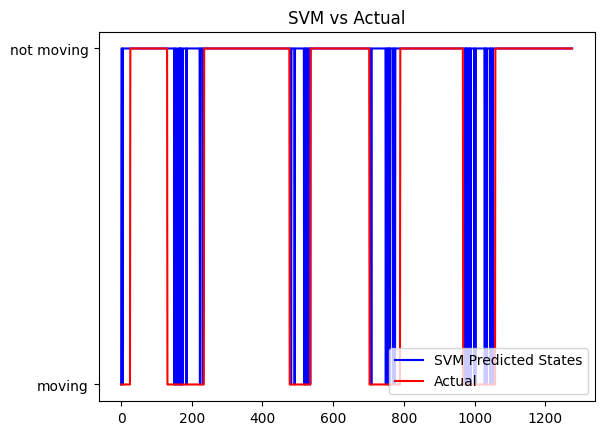

In [31]:
y1 = svm_clf_pred
y2 = y_prednum



# Plot data on each subplot
plt.plot(y1, color='blue')
#ax1.set_title('HMM Predicted States')

plt.plot(y2, color='red')

plt.legend(["SVM Predicted States", "Actual"],loc='lower right')
plt.title("SVM vs Actual")
# Display the plot
plt.show()


In [32]:
svm_clf_pred

array(['moving', 'not moving', 'not moving', ..., 'not moving',
       'not moving', 'not moving'], dtype='<U10')

In [25]:
X_pred[0]


HipCenter X         0.054605
HipCenter Y         0.004096
HipCenter Z         0.078707
Spine X             0.059549
Spine Y             0.004661
Spine Z             0.077096
Head X              0.078854
Head Y              0.012986
Head Z              0.074163
ShoulderCenter X    0.071414
ShoulderCenter Y    0.005570
ShoulderCenter Z    0.076600
ShoulderLeft X      0.082347
ShoulderLeft Y      0.004339
ShoulderLeft Z      0.086503
ElbowLeft X         0.070604
ElbowLeft Y         0.009844
ElbowLeft Z         0.100754
WristLeft X         0.075548
WristLeft Y         0.012895
WristLeft Z         0.085612
HandLeft X          0.071223
HandLeft Y          0.011362
HandLeft Z          0.097449
ShoulderRight X     0.076059
ShoulderRight Y     0.013322
ShoulderRight Z     0.099200
ElbowRight X        0.081679
ElbowRight Y        0.016012
ElbowRight Z        0.149891
WristRight X        0.042937
WristRight Y        0.009144
WristRight Z        0.133823
HandRight X         0.035935
HandRight Y   